In [1]:
from quantum import *

## Solving the time-independent Schrodinger equation

When solving the time-independet Schrodinger equation, we are faced with solving a boundary value problem, or finding a solution to a differential equation with the solution being specified at two or more points. This is contrasted with an initial value problem, where we want to find a solution with the solution only specified at one point. If we restrict our particle to the finite domain $[a, b]$, then we'll have that $\psi(a)=0=\psi(b)$ as our boundary conditions.

$$-\frac{\hbar}{2m}\psi''(x)+V(x)\psi(x) = E\psi(x)$$

One method to solving boundary value problems is called the shooting method. The shooting method turns the problem into an initial value problem by starting at one of the boundaries, guessing an initial free parameter, finding solving up to the boundary (that is, "shooting" over to the boundary), and checking if our solution matches the boundary condition. If it does not, we update our guess on our free parameter and then repeat this process until our solution is sufficiently close to the boundary condition.

Let's see this in a simple scenario with an infinite square well. Recall that the potential of an infinite square is 

$$V(x) = \begin{cases}0 & 0 \leq x \leq L \\ \infty & \text{otherwise} \end{cases},$$

so we get the boundary conditions $\psi(0)=0=\psi(L)$ discussed earlier. We'll have to make a guess for the initial slope, so turning this into an initial value problem, we have $\psi(0)=0, \psi'(0)=s$, where $s$ is a free parameter. For arbitrary potentials, we also don't know $E$, the total energy of the system, but for now, we'll plug in the analytic solution for the energy of an infinite square well,

$$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}.$$

For convenience, we'll also set $m=1$ and $h=1$ (so $\hbar = \frac{1}{2\pi}$). If we solve this initial value problem with the energy given, then we see that the initial slope doesn't really matter:

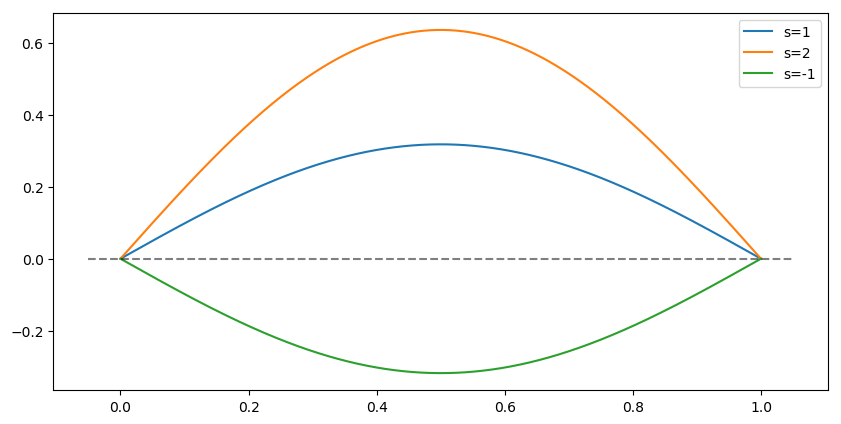

In [2]:
n = 1
L = 1
E = ISW_energy(n, L)
V = lambda x: 0
res1 = solve_tise(E, V, 0, L, s=1, max_step=1e-3)
res2 = solve_tise(E, V, 0, L, s=2, max_step=1e-3)
res3 = solve_tise(E, V, 0, L, s=-1, max_step=1e-3)


fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(res1.t, res1.y[0], label="s=1")
ax.plot(res2.t, res2.y[0], label="s=2")
ax.plot(res3.t, res3.y[0], label="s=-1")
x_axis(ax)
ax.legend();

As we can see, assuming we have the right energy, the initial energy only rescales the wave function. And it turns out that if you satisify the TISE and the boundary conditions, you only need to scale your solution by 

$$C = \left(\int_{-\infty}^{\infty} \psi(x)^2 dx\right)^{-1}$$

to satisfy normalization.

However, what if we do not know $E$? The choice of $E$ does matter, so an incorrect choice of $E$ might not satisfy the boundary conditions. In the example below, we solve the IVP but with the energy given perturbed a small amount from the actual energy.

0.00267277502791388
-0.001464361058504247


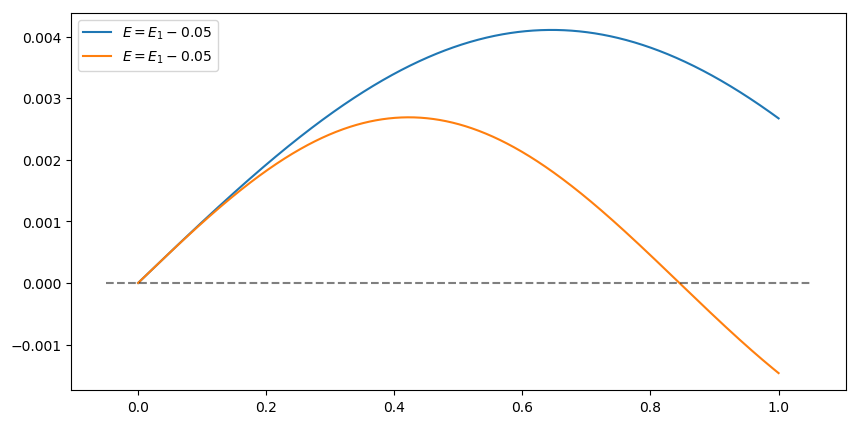

In [3]:
dE = .05
res1 = solve_tise(E-dE, V, 0, L, max_step=1e-3)
res2 = solve_tise(E+dE, V, 0, L, max_step=1e-3)

print(res1.y[0, -1])
print(res2.y[0, -1])

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(res1.t, res1.y[0], label=f"$E=E_1-{dE}$")
ax.plot(res2.t, res2.y[0], label=f"$E=E_1-{dE}$")
x_axis(ax)
ax.legend();

Instead of shooting the initial slope (which in general, any value will do), we can shoot the energy. If $\psi^{(E)}$ is a solution with $E$ as the energy, then we can rephrase the shooting problem as finding the roots of the function 

$$ g(E) = \psi^{(E)}(L). $$

In the example above, we have $g(E_1-0.05) = \psi^{(E_1-0.05)}(L)=0.0027$ and $g(E_1-0.05)=\psi^{(E_1+0.05)}(L)=-0.0015$. 

A simple root finding method for a continuous function (which we are assuming $g$ is) comes from the intermediate value theorem: if $f(a)$ and $f(b)$ have opposite signs, then there exists some $x$ such that $f(x)=0$. The bisection method takes advantage of this. Given a interval and a (continuous) function taking opposite signs at the end of the interval, the method calculates the function at the midpoint of the interval, checks the sign, and then updates the interval with this new midpoint so that the function still has opposite signs with the new interval, and repeating this until the interval is as small as desired.

From the example above, since $g(E_1-0.05)$ and $g(E_1+0.05)$ have opposite signs, we know that there exists a root within that interval (and of course, the root is at $E_1$). Let's see the shooting method in action now. Using the bisection method, we're going to need an inital energy range, so for simplicity, just use the $[E_1-0.05, E_1+0.05]$ interval from above.

actual energy: 0.12500000
calculated energy: 0.12500038


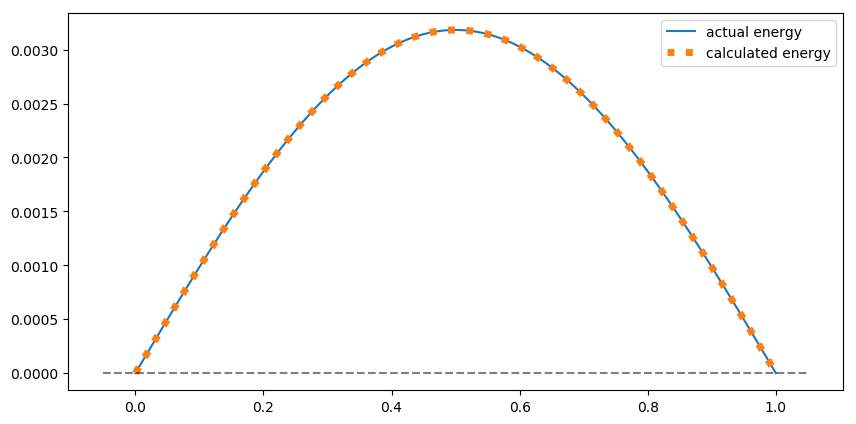

In [4]:
E_shoot = shoot(E-dE, E+dE, V, 0, L)
print(f"actual energy: {E:.8f}")
print(f"calculated energy: {E_shoot:.8f}")

res1 = solve_tise(E, V, 0, L, max_step=1e-3)
res2 = solve_tise(E_shoot, V, 0, L, max_step=1e-3)
fig, ax = plt.subplots(dpi=100, figsize=(10, 5))

ax.plot(res1.t, res1.y[0], label="actual energy")
ax.plot(res2.t, res2.y[0], label="calculated energy", ls=":", lw=5)
x_axis(ax)
ax.legend();

As we can see, the calculated energy is very close to the original energy, and there is almost no difference in the solutions when using either energy.

The shooting method, however, will not be sufficient for other potentials. Let's see why with the finite square well. We'll be using the potential 

$$V(x)=\begin{cases} -V_0 & -L \leq x \leq L \\ 0 & -L' \leq x < L \text{ or } L < x \leq L'\\ \infty & \text{otherwise}\end{cases}$$

for the finite square well (only difference from class is the infinite height barrier $L'$ from the origin, keeping the particle in a finite domain). Let's set $V_0=1$, $L=1$, $L'=5$, and then see what a solution looks like with $E=-.5$.

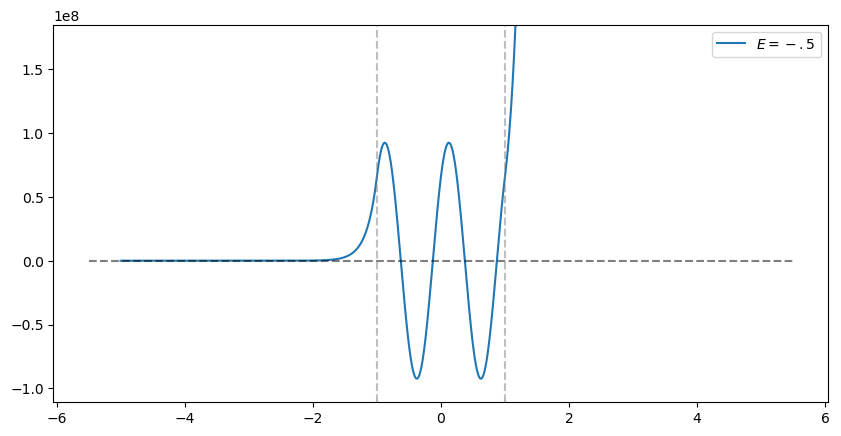

In [5]:
L, Lp, V0 = 1, 5, 1
V = lambda x: -V0 if abs(x) < L else 0
res = solve_tise(-.5, V, -Lp, Lp, max_step=1e-3)

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(res.t, res.y[0], label="$E=-.5$")
i = np.where(res.t >= L)[0][0]
ymin, ymax = res.y[0,:i].min(), res.y[0,:i].max()
ymin, ymax = ymin-.1*(ymax-ymin), ymax+.5*(ymax-ymin)
ax.set_ylim(ymin, ymax)
x_axis(ax)
hline(ax, [-L, L])
ax.legend();

In the classically forbiden region (that is, where $V(x)>E$), the solution blows up due to numerical error. It seems that as the solutions in these regions are exponetial functions, the "opposite" exponential takes over (that is, instead of the decaying solution $e^{-\alpha x}$, we get the increasing solution $e^{\alpha x}$). However, note that the solution seems to be correct in the classically forbidden region on the left, which is where we start solving from. What does the solution look like if we start solving from the right?

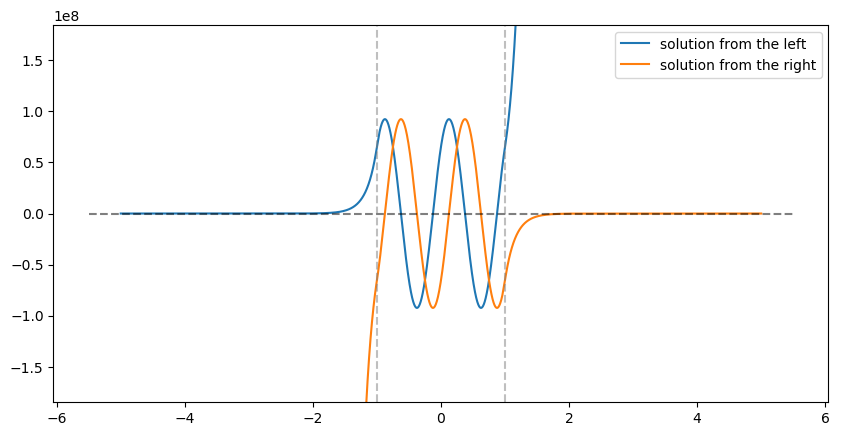

In [6]:
res1 = solve_tise(-.5, V, -Lp, Lp, max_step=1e-3)
res2 = solve_tise(-.5, V, Lp, -Lp, max_step=1e-3)

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(res1.t, res1.y[0], label="solution from the left")
ax.plot(res2.t, res2.y[0], label="solution from the right")
i = np.where(res1.t >= L)[0][0]
ymin, ymax = res1.y[0,:i].min(), res1.y[0,:i].max()
ymin, ymax = ymin-.5*(ymax-ymin), ymax+.5*(ymax-ymin)
ax.set_ylim(ymin, ymax)
x_axis(ax)
hline(ax, [-L, L])
ax.legend();

The solution from the right has the correct functional form, so we would want to "splice" the two solution together to make a new solution. If we do this for this particular energy by taking the solution from the left all the way up to the classically forbidden region on the right, and then taking the solution from the right, we get a discontinous solution, which does not satisfy the Schrodinger equations. However, if we change the energy to be close to an allowed energy...

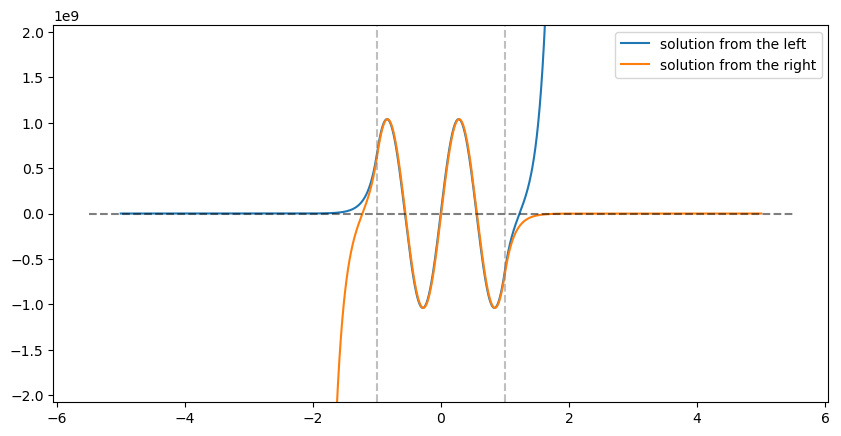

In [7]:
E = -.6
res1 = solve_tise(E, V, -Lp, Lp, max_step=1e-3)
res2 = solve_tise(E, V, Lp, -Lp, max_step=1e-3)

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(res1.t, res1.y[0], label="solution from the left")
ax.plot(res2.t, res2.y[0], label="solution from the right")
i = np.where(res1.t >= L)[0][0]
ymin, ymax = res1.y[0,:i].min(), res1.y[0,:i].max()
ymin, ymax = ymin-.5*(ymax-ymin), ymax+.5*(ymax-ymin)
ax.set_ylim(ymin, ymax)
x_axis(ax)
hline(ax, [-L, L])
ax.legend();

the solutions "match", and so the spliced solution is continous. This is the essence of the matching method. We shoot from the left and right up to some matching point, which should happen before any divergent behavior for both solutions, and then aim to match the function and the derivative at that point. As a root finding problem, if $\overrightarrow{\psi^{(E)}}$ is a solution from the left and $\overleftarrow{\psi^{(E)}}$ is a solution from the right, both with energy $E$, and $x_m$ is the match point, then we want to find the root of  

$$g(E) = \overrightarrow{\psi^{(E)}}\,'(x_m)-\frac{\overrightarrow{\psi^{(E)}}(x_m)}{\overleftarrow{\psi^{(E)}}(x_m)} \overleftarrow{\psi^{(E)}}\,'(x_m)\quad,$$

which will find the energy when the slope difference between the matched solutions is 0. For the matching method, we'll use the secant method, which is just Newton's method for finding roots, but we don't need to supply the derivative of $g$ (and is instead approximated). Below is a solution that we've matched.

converged: True
-0.391453695424628


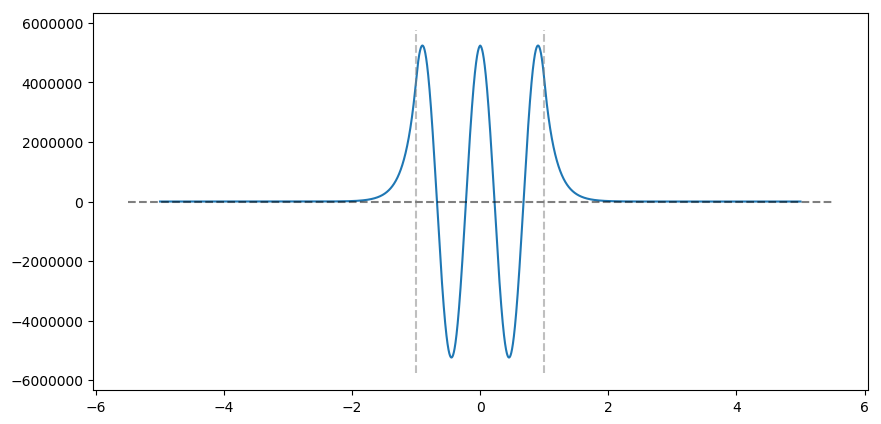

In [8]:
E = match(-.5, -.51, V, -Lp, Lp, 0)
print(E)

x, psi = splice(E, V, -Lp, Lp, 0)

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(x, psi)
x_axis(ax)
hline(ax, [-L, L])

 The matching works well for general potentials, but we still need to search for the energy values. However, there is a method that can solve for the approximate energies directly, called the direct matrix method. Recall that we can write the TISE as 

$$\hat{H}\psi(x) = E \psi(x)$$

where $\hat{H} = -\frac{\hbar}{2m}\frac{d^2}{dx^2} + V(x)$. So finding the energies reduces to finding the eigenvalues of $\hat{H}$. However, we'll need to discretize $\hat{H}$ in order to use numerical methods for solving eigenvalues. By discretizing our domain into N points as $x_j$ where $j ={0, 1, \dots, N-1}$, we can use the central difference formula to approxmiate the TISE as

$$-\frac{\hbar^2}{2m}\frac{\psi_{j+1} - 2\psi_{j} + \psi_{j-1}}{\Delta x^2} + V_j\psi_j = E\psi_j + O(\Delta x^2) \quad \text{for $j=1, 2, \dots, N-2$} $$

where $x_{j+1}-x_{j} = \Delta x$, $\psi_j = \psi(x_j)$, and $V_j = V(x_j)$. Rearranging with $k = \frac{\hbar^2}{2m\Delta x^2}$, $\psi_0=0$, we have the following system of equations:

\begin{align}
-k\psi_2 + (2k+V_1)\psi_1 &= E\psi_1 \\
-k\psi_3 + (2k+V_2)\psi_2  -k\psi_1 &= E\psi_2\\
-k\psi_4 + (2k+V_3)\psi_3  -k\psi_2 &= E\psi_3\\
\vdots\\
(2k+V_{N-2})\psi_{N-2}-k\psi_{N-3} &= E\psi_{N-2}
\end{align}

We can write this in matrix form,  

\begin{align}
\begin{bmatrix}
2k+V_1 & -k & 0 & \dots & 0 \\
-k & 2k+V_2 & -k & \ddots & \vdots \\
0 & -k & 2k+V_3 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -k \\
0 & \dots & 0 & -k & 2k+V_{N-2} 
\end{bmatrix}
\begin{bmatrix}\psi_1 \\ \psi_2 \\ \psi_3 \\ \vdots \\ \psi_{N-2} \end{bmatrix} = E 
\begin{bmatrix}\psi_1 \\ \psi_2 \\ \psi_3 \\ \vdots \\ \psi_{N-2} \end{bmatrix}
\end{align}

or more compactly, $H\psi = E\psi + O(\Delta x^2)$. Hence, we can approximate the eigenvalues of $\hat{H}$ by finding the eigenvalues of the discretized Hamiltonian $H$. In practice, the eigenvalues accumlate error for the higher energy states, but for small enough energy states and the matching method, we can now solve for the $n$th exited state of arbitrary potentials.

One system we can use to check our calculations is the quantum harmonic oscillator, whose analytic solutions are well known. Its potential is given by $V(x) = \frac{1}{2}m\omega^2x^2$, and its energy levels are $E_n = \hbar\omega (n+\frac{1}{2})$. Using the direct matrix method and letting $\omega=1$, $m=1$ and $h=1$, the plot below shows the difference between the analytic and diect matrix method. We can see that increasing the subdivision (and thus $\delta x$) increases the accuracy of the estimate.

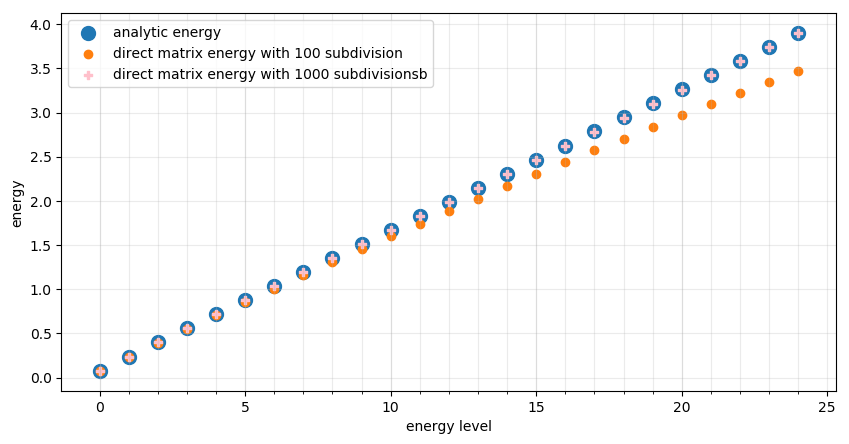

In [9]:
V = lambda x: 1/2*x**2
Es100 = solve_energies(V, -Lp, Lp, n=100)
Es1000 = solve_energies(V, -Lp, Lp, n=1000)
ns = np.arange(0, 25)

fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.scatter(ns, hbar*(ns+1/2), label="analytic energy", s=100)
ax.scatter(ns, Es100[ns], label="direct matrix energy with 100 subdivision")
ax.scatter(ns, Es1000[ns], label="direct matrix energy with 1000 subdivisionsb", marker="P", color="pink")
ax.set_xlabel("energy level")
ax.set_ylabel("energy")
ax.set_xticks(ns, minor=True)
ax.grid(alpha=.25)
ax.grid(alpha=.25, which="minor")
ax.legend();

Below, we can see some of the excited states for the quantum harmonic oscillator.

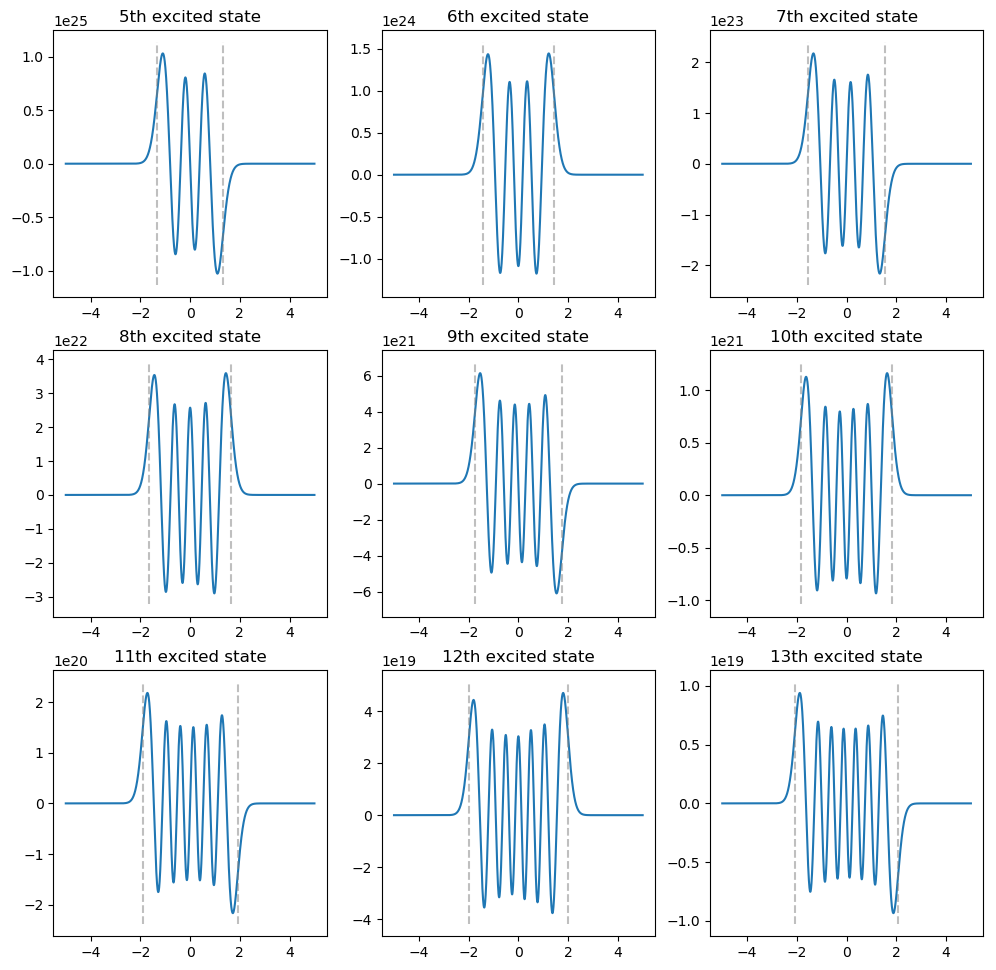

In [10]:
fig, axs = plt.subplots(3, 3, dpi=100, figsize=(12,12))
for i in range(9):
    E = Es1000[i+5]
    x, psi = splice(E, V, -Lp, Lp, .1)
    axs[i//3][i%3].plot(x, psi)
    axs[i//3][i%3].set_title(f"{i+5}th excited state")
    tp = np.sqrt(2*E)
    hline(axs[i//3][i%3], [-tp, tp])

Back to the finite square well, we can see some of the wave functions for the higher excited states easily. Notice that after the 6th excited state, there is enough energy for the solution the classically forbidden region to be oscillatory.

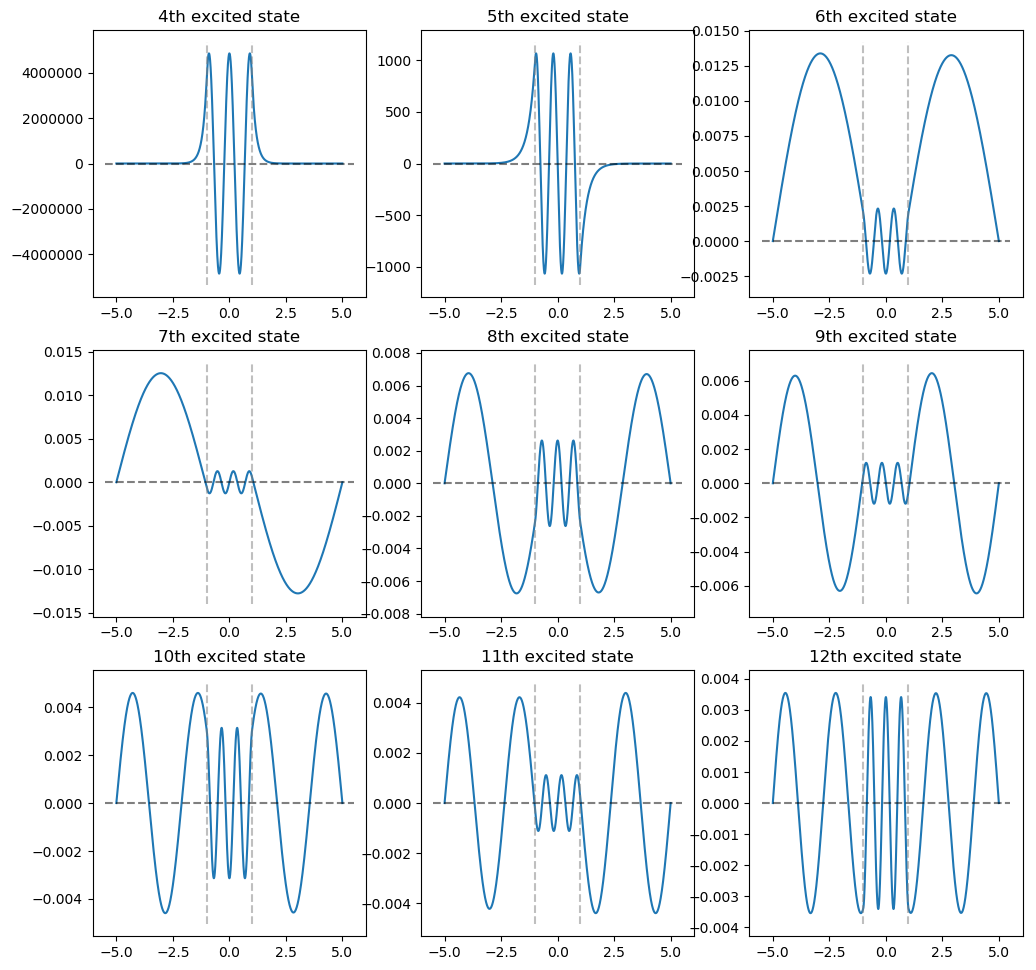

In [11]:
V = lambda x: -V0 if abs(x) < L else 0
Es = solve_energies(V, -Lp, Lp, n=1000)
fig, axs = plt.subplots(3, 3, dpi=100, figsize=(12,12))
for i in range(9):
    x, psi = splice(Es[i+4], V, -Lp, Lp, L)
    axs[i//3][i%3].plot(x, psi)
    axs[i//3][i%3].set_title(f"{i+4}th excited state")
    x_axis(axs[i//3][i%3])
    hline(axs[i//3][i%3], [-L, L])